## Dogs vs Cats

pg. 158

Because this is a binary-classification problem, the network will be ended with a single unit (a Dense layer of size 1), and a sigmoid activation. This will encode the probability that the network is looking at one class or the other.

In [1]:
import os
import shutil

from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


### Creating Training, Validation, and Testing Directories

In [2]:
dataset_dir = '/Users/owner/Desktop/dogs-vs-cats/data/training_data_kaggle/'


train_dir = os.path.join(dataset_dir, 'train')
# os.mkdir(train_dir)

valid_dir = os.path.join(dataset_dir, 'valid')
# os.mkdir(validation_dir)

test_dir = os.path.join(dataset_dir, 'test')
# os.mkdir(test_dir)

#### Creating Training Cat and Dog Directories

In [3]:
train_cat_dir = os.path.join(train_dir, 'cats')
# os.mkdir(train_cat_dir)

train_dog_dir = os.path.join(train_dir, 'dogs')
# os.mkdir(train_dog_dir)

#### Creating Validation Cat and Dog Directories

In [4]:
valid_cat_dir = os.path.join(valid_dir, 'cats')
# os.mkdir(valid_cat_dir)

valid_dog_dir = os.path.join(valid_dir, 'dogs')
# os.mkdir(valid_dog_dir)

#### Creating Testing Cat and Dog Directories

In [5]:
test_cat_dir = os.path.join(test_dir, 'cats')
# os.mkdir(test_cat_dir)

test_dog_dir = os.path.join(test_dir, 'dogs')
# os.mkdir(test_dog_dir)

### Distribution of Images

#### Train Cats

In [7]:
# fnames = ['cat.{}.jpg'.format(i) for i in range(10000)]
# for fname in fnames:
#     src = os.path.join(dataset_dir, fname)
#     dst = os.path.join(train_cat_dir, fname)
#     shutil.copyfile(src, dst)

#### Valid Cats

In [8]:
# fnames = ['cat.{}.jpg'.format(i) for i in range(10000, 11250)]
# for fname in fnames:
#     src = os.path.join(dataset_dir, fname)
#     dst = os.path.join(valid_cat_dir, fname)
#     shutil.copyfile(src, dst)

#### Test Cats

In [9]:
# fnames = ['cat.{}.jpg'.format(i) for i in range(11250, 12500)]
# for fname in fnames:
#     src = os.path.join(dataset_dir, fname)
#     dst = os.path.join(test_cat_dir, fname)
#     shutil.copyfile(src, dst)

#### Train Dog

In [10]:
# fnames = ['dog.{}.jpg'.format(i) for i in range(10000)]
# for fname in fnames:
#     src = os.path.join(dataset_dir, fname)
#     dst = os.path.join(train_dog_dir, fname)
#     shutil.copyfile(src, dst)

#### Valid Dog

In [11]:
# fnames = ['dog.{}.jpg'.format(i) for i in range(10000, 11250)]
# for fname in fnames:
#     src = os.path.join(dataset_dir, fname)
#     dst = os.path.join(valid_dog_dir, fname)
#     shutil.copyfile(src, dst)

#### Test Dog

In [12]:
# fnames = ['dog.{}.jpg'.format(i) for i in range(11250, 12500)]
# for fname in fnames:
#     src = os.path.join(dataset_dir, fname)
#     dst = os.path.join(test_dog_dir, fname)
#     shutil.copyfile(src, dst)

#### Number of Images in Each Training Split

In [16]:
print('total training cat images:', len(os.listdir(train_cat_dir)))
print('total training dog images:', len(os.listdir(train_dog_dir)))


print('total validation cat images:', len(os.listdir(valid_cat_dir)))
print('total validation dog images:', len(os.listdir(valid_dog_dir)))

print('total test cat images:', len(os.listdir(test_cat_dir)))
print('total test dog images:', len(os.listdir(test_dog_dir)))

total training cat images: 10000
total training dog images: 10000
total validation cat images: 1250
total validation dog images: 1250
total test cat images: 1250
total test dog images: 1250


### Building a Network

In [17]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu',\
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [18]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

### Configuring the Model for Training

In [19]:
model.compile(loss='binary_crossentropy',\
             optimizer=optimizers.RMSprop(lr=1e-4),\
             metrics=['acc'])

Instructions for updating:
keep_dims is deprecated, use keepdims instead


### Data Preprocessing

In [20]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [21]:
train_generator = train_datagen.flow_from_directory(train_dir,\
                                                    target_size=(150, 150),\
                                                    batch_size=20,\
                                                    class_mode='binary')

Found 20000 images belonging to 2 classes.


In [22]:
validation_generator = test_datagen.flow_from_directory(valid_dir,\
                                                        target_size=(150, 150),\
                                                        batch_size=20,\
                                                        class_mode='binary')

Found 2500 images belonging to 2 classes.


In [23]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


### Fitting the Model Using a Batch Generator

In [24]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/30
100/100 [==============================] - 84s 836ms/step - loss: 0.6870 - acc: 0.5370 - val_loss: 0.6608 - val_acc: 0.6030
Epoch 2/30
100/100 [==============================] - 87s 868ms/step - loss: 0.6610 - acc: 0.6085 - val_loss: 0.6514 - val_acc: 0.5700
Epoch 3/30
100/100 [==============================] - 127s 1s/step - loss: 0.6407 - acc: 0.6390 - val_loss: 0.6054 - val_acc: 0.6540
Epoch 4/30
100/100 [==============================] - 85s 851ms/step - loss: 0.5950 - acc: 0.6770 - val_loss: 0.5524 - val_acc: 0.7140
Epoch 5/30
100/100 [==============================] - 82s 816ms/step - loss: 0.5822 - acc: 0.6875 - val_loss: 0.5572 - val_acc: 0.6990
Epoch 6/30
100/100 [==============================] - 81s 815ms/step - loss: 0.5668 - acc: 0.7145 - val_loss: 0.5163 - val_acc: 0.7630
Epoch 7/30
100/100 [==============================] - 82s 818ms/step - loss: 0.5584 - acc: 0.7005 - val_loss: 0.5466 - val_acc: 0.7170
Epoch 8/30
100/100 [==============================] - 81s

In [25]:
import matplotlib.pyplot as plt

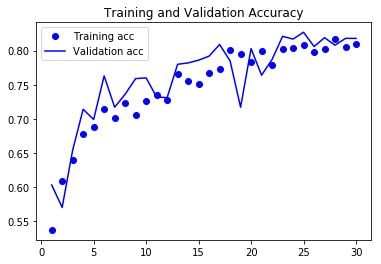

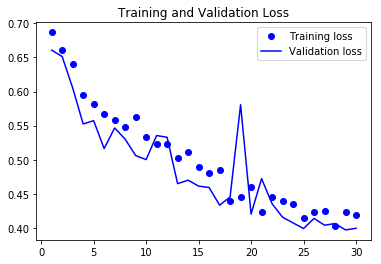

In [27]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

### Using Data Augmentation

In [28]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')


In [29]:
from keras.preprocessing import image

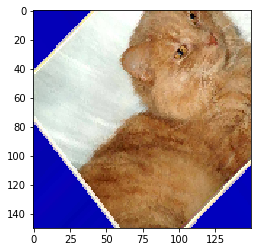

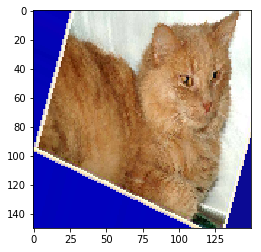

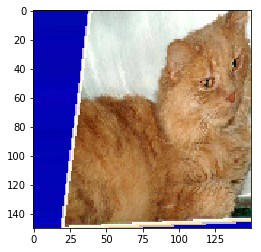

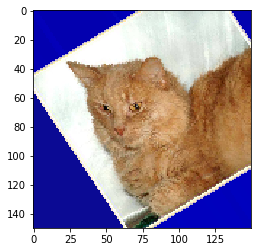

In [30]:
fnames = [os.path.join(train_cat_dir, fname) for
    fname in os.listdir(train_cat_dir)]

img_path = fnames[3]

img = image.load_img(img_path, target_size=(150, 150))

x = image.img_to_array(img)

x = x.reshape((1,) + x.shape)

i=0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

In [31]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',\
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',\
              optimizer=optimizers.RMSprop(lr=1e-4),\
              metrics=['acc'])

In [32]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

In [33]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [34]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150), 
                                                    batch_size=32, 
                                                    class_mode='binary')

Found 20000 images belonging to 2 classes.


In [35]:
validation_generator = test_datagen.flow_from_directory(
    valid_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

Found 2500 images belonging to 2 classes.


In [36]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/100
100/100 [==============================] - 130s 1s/step - loss: 0.6933 - acc: 0.5191 - val_loss: 0.6804 - val_acc: 0.5875
Epoch 2/100
100/100 [==============================] - 127s 1s/step - loss: 0.6804 - acc: 0.5662 - val_loss: 0.6636 - val_acc: 0.5681
Epoch 3/100
100/100 [==============================] - 126s 1s/step - loss: 0.6680 - acc: 0.5941 - val_loss: 0.6375 - val_acc: 0.6462
Epoch 4/100
100/100 [==============================] - 128s 1s/step - loss: 0.6567 - acc: 0.6153 - val_loss: 0.6269 - val_acc: 0.6488
Epoch 5/100
100/100 [==============================] - 128s 1s/step - loss: 0.6503 - acc: 0.6078 - val_loss: 0.6102 - val_acc: 0.6763
Epoch 6/100
100/100 [==============================] - 128s 1s/step - loss: 0.6342 - acc: 0.6350 - val_loss: 0.6012 - val_acc: 0.6581
Epoch 7/100
100/100 [==============================] - 128s 1s/step - loss: 0.6264 - acc: 0.6391 - val_loss: 0.5943 - val_acc: 0.6619
Epoch 8/100
100/100 [==============================] - 129s 1s

Epoch 62/100
100/100 [==============================] - 129s 1s/step - loss: 0.4729 - acc: 0.7672 - val_loss: 0.3696 - val_acc: 0.8394
Epoch 63/100
100/100 [==============================] - 129s 1s/step - loss: 0.4463 - acc: 0.7875 - val_loss: 0.4036 - val_acc: 0.8194
Epoch 64/100
100/100 [==============================] - 129s 1s/step - loss: 0.4696 - acc: 0.7744 - val_loss: 0.3909 - val_acc: 0.8256
Epoch 65/100
100/100 [==============================] - 129s 1s/step - loss: 0.4541 - acc: 0.7791 - val_loss: 0.3703 - val_acc: 0.8381
Epoch 66/100
100/100 [==============================] - 129s 1s/step - loss: 0.4590 - acc: 0.7900 - val_loss: 0.3918 - val_acc: 0.8156
Epoch 67/100
100/100 [==============================] - 129s 1s/step - loss: 0.4710 - acc: 0.7778 - val_loss: 0.3829 - val_acc: 0.8244
Epoch 68/100
100/100 [==============================] - 129s 1s/step - loss: 0.4727 - acc: 0.7784 - val_loss: 0.3615 - val_acc: 0.8400
Epoch 69/100
100/100 [==============================] -

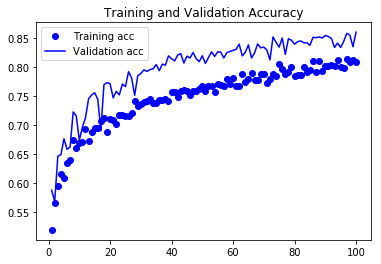

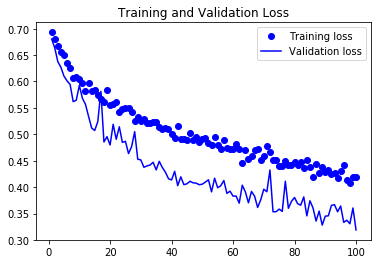

In [37]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()